In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv("HousingData.csv")

In [104]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [105]:
df.shape

(506, 14)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [107]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [108]:
df.fillna(df.mean(), inplace=True)

In [109]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [110]:
df.drop('CHAS', axis = 1,inplace=True)

CRIM          Axes(0.125,0.11;0.0503247x0.77)
ZN          Axes(0.18539,0.11;0.0503247x0.77)
INDUS      Axes(0.245779,0.11;0.0503247x0.77)
NOX        Axes(0.306169,0.11;0.0503247x0.77)
RM         Axes(0.366558,0.11;0.0503247x0.77)
AGE        Axes(0.426948,0.11;0.0503247x0.77)
DIS        Axes(0.487338,0.11;0.0503247x0.77)
RAD        Axes(0.547727,0.11;0.0503247x0.77)
TAX        Axes(0.608117,0.11;0.0503247x0.77)
PTRATIO    Axes(0.668506,0.11;0.0503247x0.77)
B          Axes(0.728896,0.11;0.0503247x0.77)
LSTAT      Axes(0.789286,0.11;0.0503247x0.77)
MEDV       Axes(0.849675,0.11;0.0503247x0.77)
dtype: object

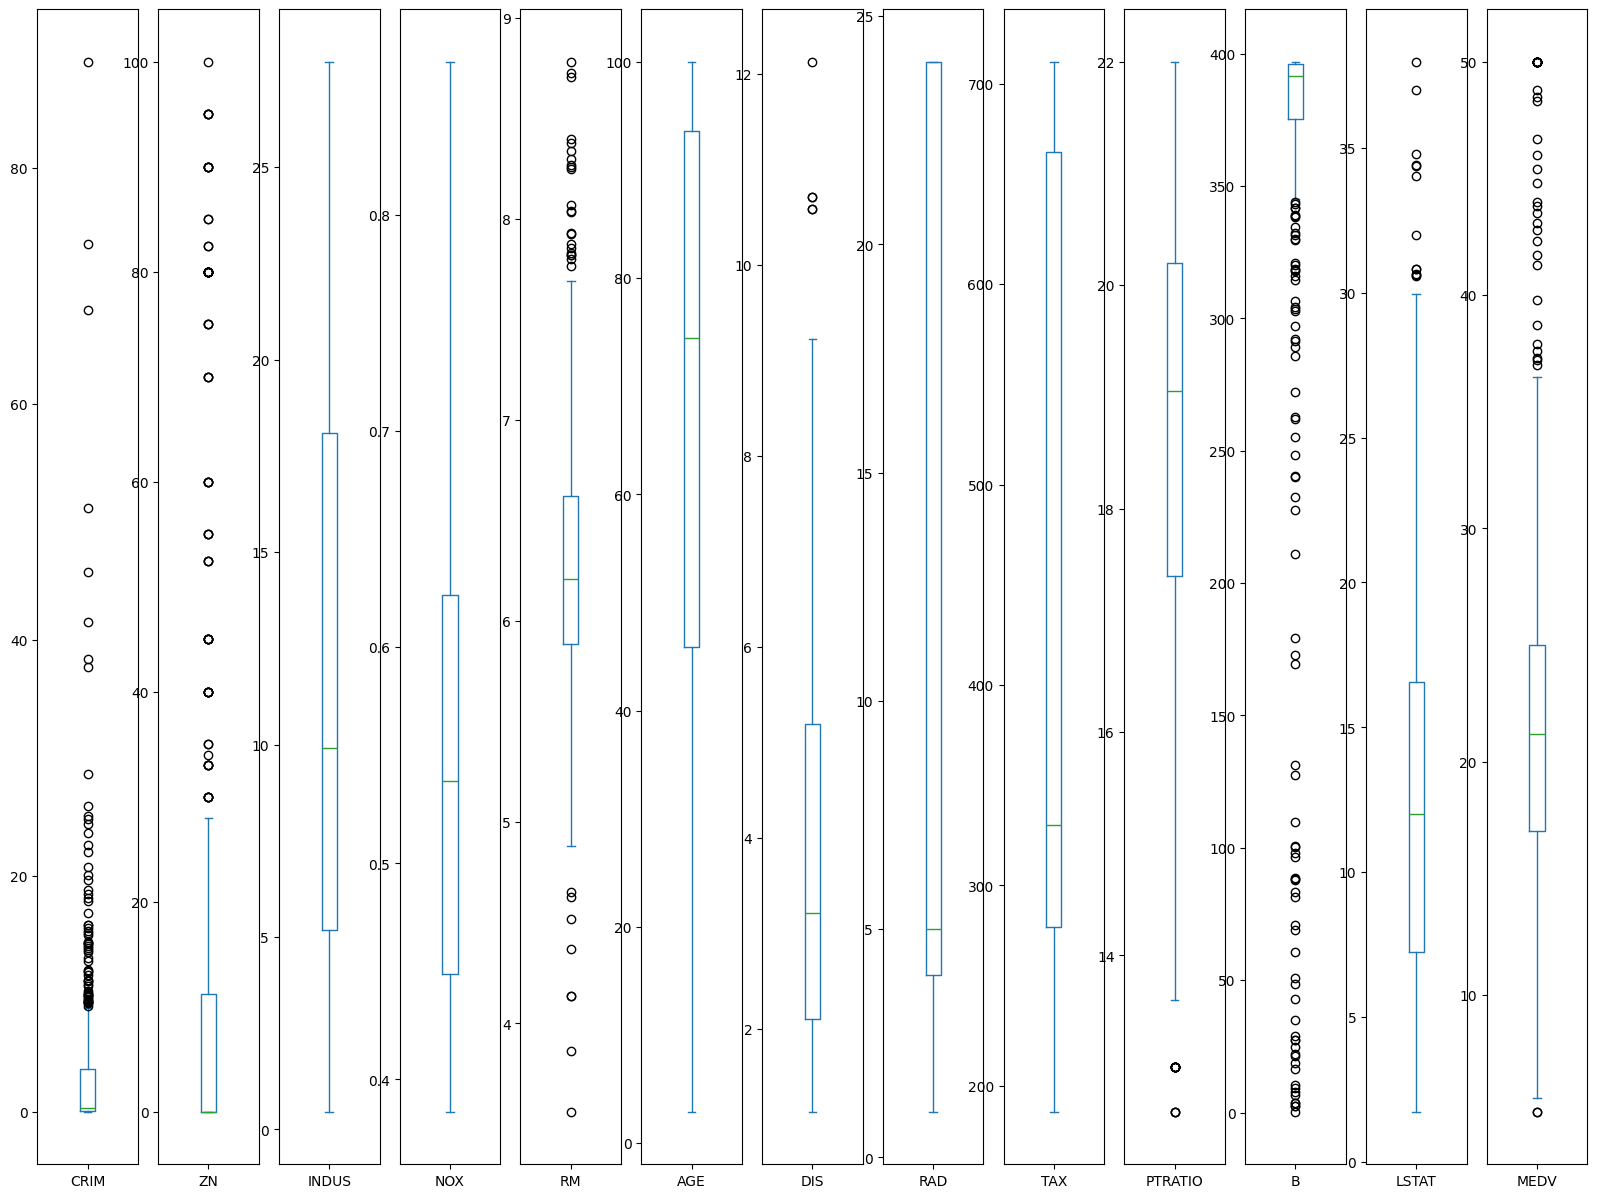

In [111]:
df.plot(kind='box', subplots=True, figsize=(20, 15),)

In [112]:
col_outliers=['CRIM','ZN','RM','DIS','PTRATIO','B','LSTAT','MEDV']

In [113]:
print( df['MEDV'])

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [114]:
for col in col_outliers:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
  
    df[col] = df[col].apply(lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x))
    

In [115]:
matrix =df.corr()

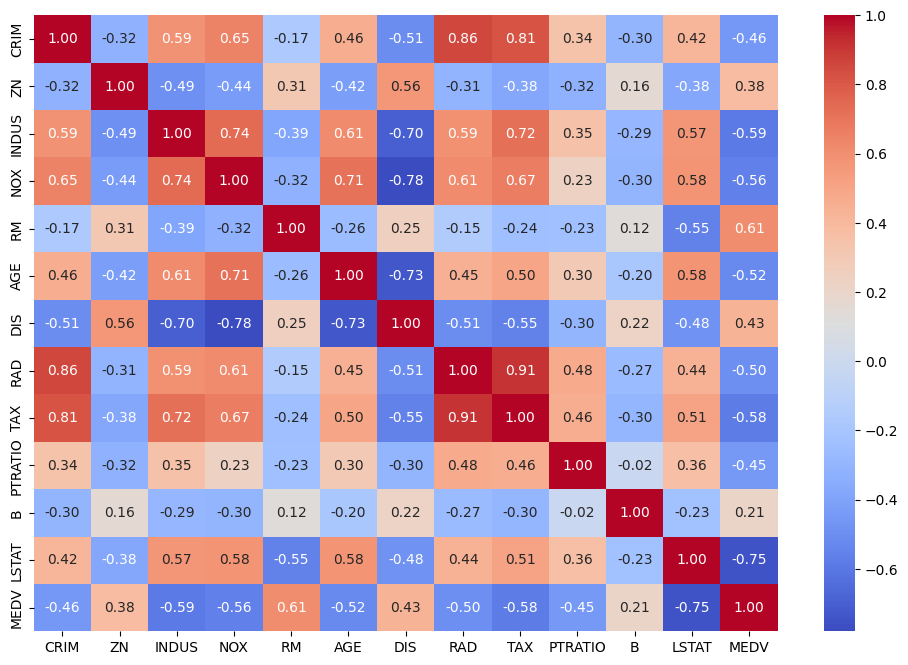

In [116]:
plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [117]:
high_corr = matrix[abs(matrix['MEDV']) > 0.6].index.tolist()
print(matrix['MEDV'])
high_corr

CRIM      -0.455971
ZN         0.384372
INDUS     -0.591347
NOX       -0.561289
RM         0.606891
AGE       -0.519187
DIS        0.430072
RAD       -0.497341
TAX       -0.582550
PTRATIO   -0.451396
B          0.209088
LSTAT     -0.752320
MEDV       1.000000
Name: MEDV, dtype: float64


['RM', 'LSTAT', 'MEDV']

In [118]:
high_corr.remove('MEDV')
high_corr

['RM', 'LSTAT']

Text(0.5, 0, 'MEDV')

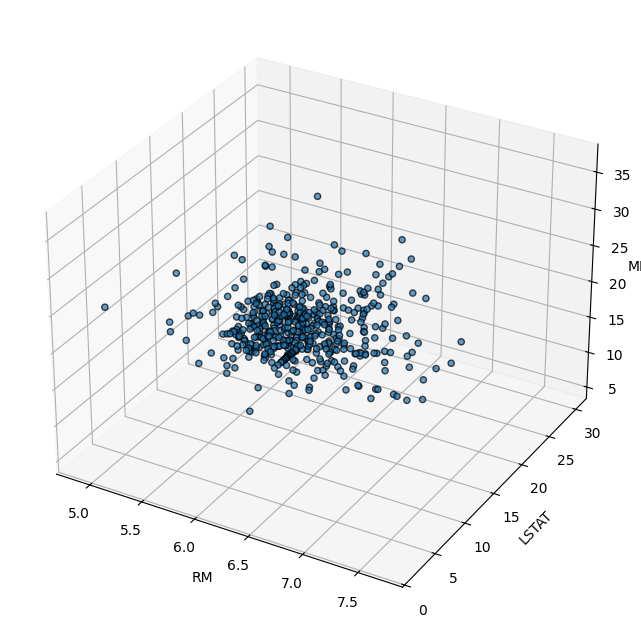

In [119]:
feature1 = high_corr[0]  
feature2 = high_corr[1]  

x = df[feature1]
y = df[feature2]
z = df['MEDV']


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot( projection='3d')


ax.scatter(x, y, z, alpha=0.7, edgecolor='k')

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('MEDV')

In [120]:
from sklearn.model_selection import train_test_split

X = df[high_corr]
y = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#just transform cuz we did fit so we have coueffs for eauqtion


In [122]:
X_test_scaled

array([[ 0.54268293,  0.25885269],
       [ 0.66535151,  0.06373938],
       [ 0.38737446,  0.5786119 ],
       [ 0.41678623,  0.1342068 ],
       [ 0.5       ,  0.55028329],
       [ 0.49354376,  0.36260623],
       [ 0.36262554,  0.5878187 ],
       [ 0.45588235,  0.79426346],
       [ 0.47560976,  0.39447592],
       [ 0.40315638,  0.44617564],
       [ 0.3758967 ,  0.57330028],
       [ 0.39490674,  0.54426346],
       [ 0.35240316,  0.52549575],
       [ 0.4766858 ,  0.37570822],
       [ 0.28873745,  0.35446176],
       [ 0.74497848,  0.38900255],
       [ 0.35007174,  0.56126062],
       [-0.00824964,  0.52549575],
       [ 0.61710904,  0.04390935],
       [ 0.45982783,  0.58073654],
       [ 0.47955524,  0.38900255],
       [ 0.56635581,  0.19334278],
       [ 0.29053085,  0.73902266],
       [ 0.6061693 ,  0.38900255],
       [ 0.3956241 ,  0.49468839],
       [ 0.18794835,  0.58109065],
       [ 0.34827834,  0.38900255],
       [ 0.6545911 ,  0.60127479],
       [ 0.37912482,

## Training Data

In [123]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(learning_rate='invscaling', eta0=0.0001,max_iter=1000,verbose=1)

#stochastic gradient deacent --> calculate coueffs(usually uses MSE)

In [124]:
from sklearn.metrics import mean_squared_error
n_iterations = 1000
losses=[]
for i in range(n_iterations):
    sgdr.partial_fit(X_train_scaled, y_train)
    y_pred = sgdr.predict(X_train_scaled)
    loss = mean_squared_error(y_train, y_pred)
    losses.append(loss)
    
print(losses)    


-- Epoch 1
Norm: 0.15, NNZs: 2, Bias: 0.251036, T: 404, Avg. loss: 240.296605
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.26, NNZs: 2, Bias: 0.420778, T: 404, Avg. loss: 234.699090
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.35, NNZs: 2, Bias: 0.567915, T: 404, Avg. loss: 230.242908
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.43, NNZs: 2, Bias: 0.701791, T: 404, Avg. loss: 226.314196
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.51, NNZs: 2, Bias: 0.826358, T: 404, Avg. loss: 222.728984
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.58, NNZs: 2, Bias: 0.943837, T: 404, Avg. loss: 219.397873
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.65, NNZs: 2, Bias: 1.055614, T: 404, Avg. loss: 216.267198
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.71, NNZs: 2, Bias: 1.162591, T: 404, Avg. loss: 213.302700
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.78, NNZs: 2, Bias: 1.265533, T: 404, Avg. loss: 210.478754
Total training tim

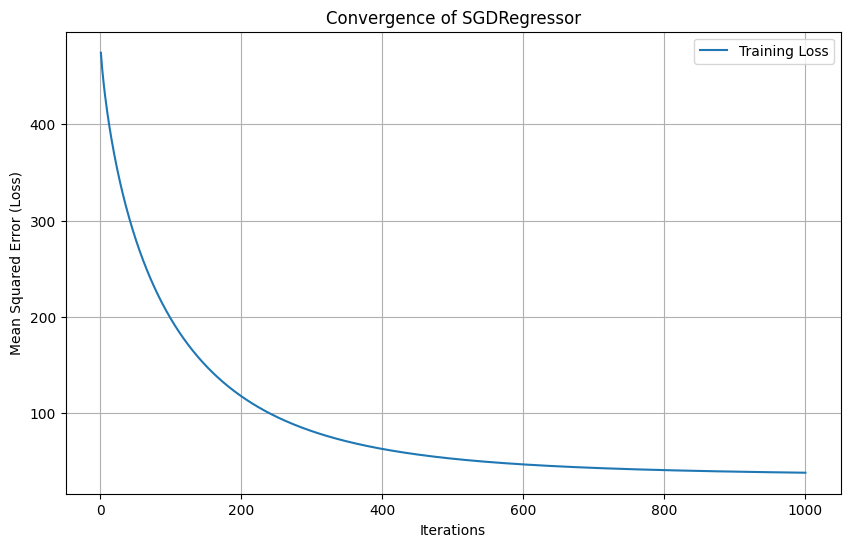

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), losses, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Convergence of SGDRegressor")
plt.legend()
plt.grid(True)
plt.show()

-- Epoch 1
Norm: 7.63, NNZs: 2, Bias: 12.486755, T: 404, Avg. loss: 71.598485
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 8.89, NNZs: 2, Bias: 14.505456, T: 404, Avg. loss: 22.398518
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9.37, NNZs: 2, Bias: 15.170462, T: 404, Avg. loss: 18.661211
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9.66, NNZs: 2, Bias: 15.462189, T: 404, Avg. loss: 17.500180
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9.91, NNZs: 2, Bias: 15.637078, T: 404, Avg. loss: 16.737968
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 10.10, NNZs: 2, Bias: 15.681920, T: 404, Avg. loss: 16.111700
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 10.32, NNZs: 2, Bias: 15.778662, T: 404, Avg. loss: 15.564991
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 10.53, NNZs: 2, Bias: 15.832716, T: 404, Avg. loss: 15.078258
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 10.73, NNZs: 2, Bias: 15.866086, T: 404, Avg. loss: 14.637316
Total training

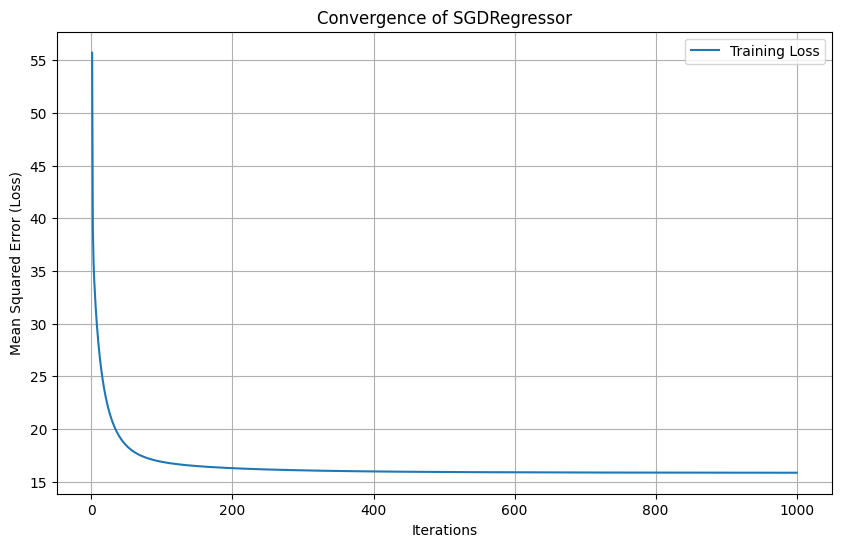

In [126]:
#learning rate =0.01
sgdr1=SGDRegressor(learning_rate='invscaling', eta0=0.01,max_iter=1000,verbose=1)
losses=[]
for i in range(n_iterations):
    sgdr1.partial_fit(X_train_scaled, y_train)
    y_pred = sgdr1.predict(X_train_scaled)
    loss = mean_squared_error(y_train, y_pred)
    losses.append(loss)
print(losses)    
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), losses, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Convergence of SGDRegressor")
plt.legend()
plt.grid(True)
plt.show()

-- Epoch 1
Norm: 1.42, NNZs: 2, Bias: 2.318695, T: 404, Avg. loss: 207.372293
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.27, NNZs: 2, Bias: 3.711568, T: 404, Avg. loss: 164.660583
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2.95, NNZs: 2, Bias: 4.810955, T: 404, Avg. loss: 137.279360
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.51, NNZs: 2, Bias: 5.729487, T: 404, Avg. loss: 117.115567
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.99, NNZs: 2, Bias: 6.519520, T: 404, Avg. loss: 101.506309
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 4.41, NNZs: 2, Bias: 7.211070, T: 404, Avg. loss: 89.066064
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 4.79, NNZs: 2, Bias: 7.823802, T: 404, Avg. loss: 78.958466
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 5.12, NNZs: 2, Bias: 8.372424, T: 404, Avg. loss: 70.626219
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 5.42, NNZs: 2, Bias: 8.866418, T: 404, Avg. loss: 63.680904
Total training time: 0

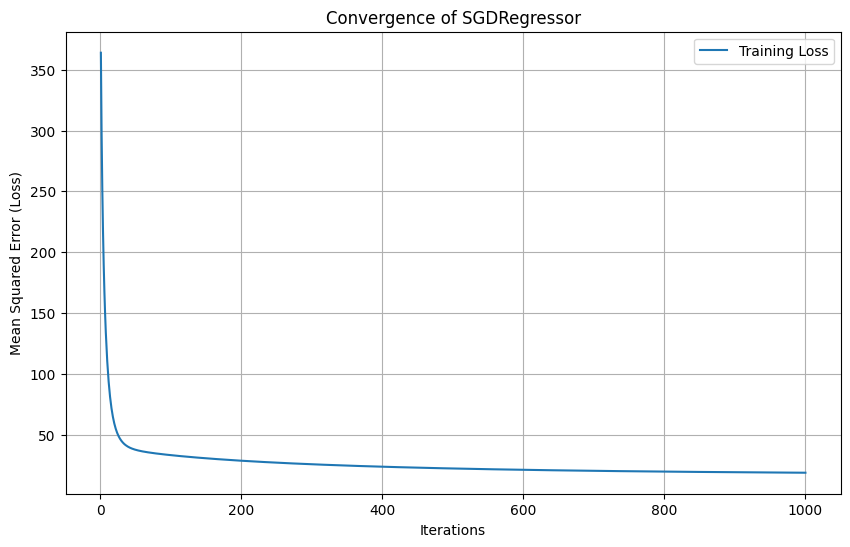

In [127]:
#learning rate =0.001
sgdr2= SGDRegressor(learning_rate='invscaling', eta0=0.001,max_iter=1000,verbose=1)
losses=[]
for i in range(n_iterations):
    sgdr2.partial_fit(X_train_scaled, y_train)
    y_pred = sgdr2.predict(X_train_scaled)
    loss = mean_squared_error(y_train, y_pred)
    losses.append(loss)
print(losses)    
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), losses, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Convergence of SGDRegressor")
plt.legend()
plt.grid(True)
plt.show()

-- Epoch 1
Norm: 0.15, NNZs: 2, Bias: 0.250664, T: 404, Avg. loss: 240.301187
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.26, NNZs: 2, Bias: 0.420102, T: 404, Avg. loss: 234.714903
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.35, NNZs: 2, Bias: 0.567209, T: 404, Avg. loss: 230.264522
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.43, NNZs: 2, Bias: 0.701056, T: 404, Avg. loss: 226.336428
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.51, NNZs: 2, Bias: 0.825571, T: 404, Avg. loss: 222.752815
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.58, NNZs: 2, Bias: 0.943035, T: 404, Avg. loss: 219.422626
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.65, NNZs: 2, Bias: 1.054802, T: 404, Avg. loss: 216.292284
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.71, NNZs: 2, Bias: 1.161801, T: 404, Avg. loss: 213.327291
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.77, NNZs: 2, Bias: 1.264740, T: 404, Avg. loss: 210.502934
Total training tim

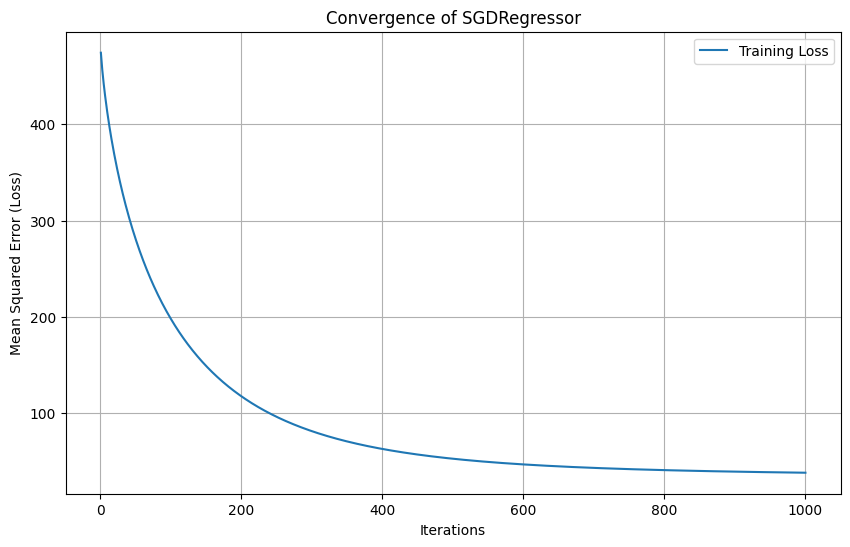

In [128]:
#learning rate =0.0001
sgdr3= SGDRegressor(learning_rate='invscaling', eta0=0.0001,max_iter=1000,verbose=1)
losses=[]
for i in range(n_iterations):
    sgdr3.partial_fit(X_train_scaled, y_train)
    y_pred = sgdr3.predict(X_train_scaled)
    loss = mean_squared_error(y_train, y_pred)
    losses.append(loss)
print(losses)    
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), losses, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Convergence of SGDRegressor")
plt.legend()
plt.grid(True)
plt.show()

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error


y_pred1 = sgdr1.predict(X_test_scaled)
y_pred2 = sgdr2.predict(X_test_scaled)
y_pred3 = sgdr3.predict(X_test_scaled)

print(y_pred1)

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true,y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

#learning_rate=0.01
mae1, mse1, rmse1, r2_1 = calculate_metrics(y_test, y_pred1)
#learning_rate=0.001
mae2, mse2, rmse2, r2_2 = calculate_metrics(y_test, y_pred2)
#learning_rate=0.0001
mae3, mse3, rmse3, r2_3 = calculate_metrics(y_test, y_pred3)

print(f"Model 1 (sgdr1) lr=0.01 Performance:")
print(f"MAE: {mae1:.4f}, MSE: {mse1:.4f}, RMSE: {rmse1:.4f}, R-squared: {r2_1:.4f}\n")

print(f"Model 2 (sgdr2) lr=0.001 Performance:")
print(f"MAE: {mae2:.4f}, MSE: {mse2:.4f}, RMSE: {rmse2:.4f}, R-squared: {r2_2:.4f}\n")

print(f"Model 3 (sgdr3) lr=0.0001 Performance:")
print(f"MAE: {mae3:.4f}, MSE: {mse3:.4f}, RMSE: {rmse3:.4f}, R-squared: {r2_3:.4f}\n")




[23.50874753 27.93280033 16.7308055  24.22488003 18.35262155 21.32244013
 16.32617651 13.94939679 20.62153899 19.03658812 16.69817397 17.36435693
 17.22892656 20.93630644 19.33846888 23.49279943 16.62618535 13.50321531
 27.75527246 17.44490692 20.75085381 24.81321489 13.13500533 22.05883598
 18.17386578 14.63053605 19.39470233 19.12460433 17.10392469 18.30501906
 17.14440828 24.59998703 24.31155024 18.94446132 14.9428985  17.02181875
 29.22851342 21.04650624 18.9846194  20.76938047 12.77465694 25.97827643
 27.80683592 18.14260922 23.64422613 16.28037607 15.52548227 24.84164414
 18.43239713 26.42398004 19.57719506 28.10361712 16.94755055 25.64610404
 30.78297975 22.241085   18.45319621 28.42903498 23.07640574 15.1067484
 24.52724582 29.01877139 27.03772868 18.4333716  26.14660846 11.48700348
 19.08328839 24.41553097 26.87621868 16.16631654 18.24673004 25.49113385
 12.97567367 23.71824585 21.78137537 15.6263705  20.70118914 27.27401355
 17.08869094 11.24220071 21.6844481  10.60216981 21.

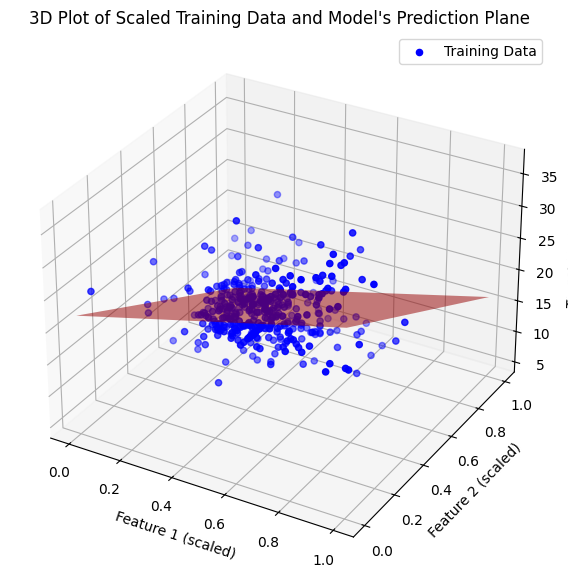

In [130]:
import numpy as np
import matplotlib.pyplot as plt

x1_range = np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 30)
x2_range = np.linspace(X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max(), 30)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

X_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]

y_grid_pred = sgdr1.predict(X_grid)
y_grid_pred = y_grid_pred.reshape(x1_grid.shape)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train, color='blue', label='Training Data')
ax.plot_surface(x1_grid, x2_grid, y_grid_pred, color='red', alpha=0.5, rstride=100, cstride=100)


ax.set_xlabel('Feature 1 (scaled)')
ax.set_ylabel('Feature 2 (scaled)')
ax.set_zlabel('Target Variable')
ax.set_title("3D Plot of Scaled Training Data and Model's Prediction Plane")


plt.legend()
plt.show()


In [131]:
x=[[5.71300, 22.60000]]
x_scaled=scaler.transform(x)
y_predicted=sgdr1.predict(x_scaled)
print(y_predicted)

[13.13500533]


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
